<a href="https://colab.research.google.com/github/tienmai56/coderschool-devc/blob/master/Copy_of_Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import pandas as pd
import numpy as np



**Import data**

In [97]:
url = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"

# Note: set param encoding = 'latin1'
# Your code here
df=pd.read_csv(url,encoding='latin1')
data=pd.DataFrame(data=df)
print(data.head(5))


  InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]


In [4]:
# Print out First 5 rows from dataframe
# Your code here
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Print out brief info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [45]:
# Your code here
null_Data=data.isnull()
print(null_Data)
#len(data.isnull())


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906,
            541907, 541908],
           dtype='int64', length=530104)


**Examine few examples of NaN values**

In [46]:
# List all NaN values
null_Data=data.isnull().index
print(null_Data)


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906,
            541907, 541908],
           dtype='int64', length=530104)


**Exclude negative Quatity entries**

In [8]:
data=data.loc[data['Quantity']>0]
print(len(data))


531285


**Exclude negative Price entries**

In [9]:
data=data.loc[data['UnitPrice']>0]
print(len(data))


530104


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [0]:
# print(data.columns.values)
# print(data)

In [11]:
# Your code here
Uk_only=data[data['Country']=='United Kingdom']
Uk_only.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).reset_index(name='Number of orders')
highest_number=Uk_only.head(1)
print('The index and customerID of the person with highest number of order is respectively as follow: ')
print(highest_number['CustomerID'])
# print(Uk_only)


The index and customerID of the person with highest number of order is respectively as follow: 
0    17850.0
Name: CustomerID, dtype: float64


**The customer with the highest money spent on purchases comes from Netherlands**

In [109]:
# Your code here
Netherlands=data.loc[data['Country']=='Netherlands']
Netherlands['Money spent']=Netherlands['Quantity']*Netherlands['UnitPrice']
#print(Netherlands.head(5))
Netherlands.groupby('CustomerID')['Money spent'].sum().sort_values(ascending=False).reset_index(name='Total money spent')
highest_number=Netherlands.head(1)
print('The customer with the highest money spent on purchases coming from Netherlands has the following ID: ')
print(highest_number['CustomerID'].get_values()[0])



The customer with the highest money spent on purchases coming from Netherlands has the following ID: 
12791.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**On which year had the highest sales?**

In [105]:
# Your code here
#devide time, date, year, hour to separate columns for future questions
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
data['Time'] = data['InvoiceDate'].dt.time
data['Year']=data['InvoiceDate'].dt.year
data['Hour']=data['InvoiceDate'].dt.hour

#calculate total sales
data['Total Sales']=data['Quantity']*data['UnitPrice']

#group by year
data.groupby('Year')['Total Sales'].sum().sort_values(ascending=False).reset_index(name='Total Sales')

#find the highest year
highest_number=data.head(1)
print('The year that has the highest sales is:  ')
print(highest_number['Year'].get_values()[0])
# print(data['Time'])



The year that has the highest sales is:  
2010


**How many orders (per hour)?**

In [93]:
print(data.columns.values)
orPerHour=data.groupby('Hour')['Quantity'].sum().reset_index(name='Orders per hour')
print(orPerHour)

['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country' 'Date' 'Time' 'Year' 'Total Sales'
 'Month' 'Hour']
    Hour  Orders per hour
0      7            10051
1      8            55596
2      9            92542
3     10           167099
4     11           117713
5     12           128285
6     13           109017
7     14            97711
8     15            89955
9     16            35757
10    17            16543
11    18             2125
12    19             3592


**Make a plot about number of orders per hour**

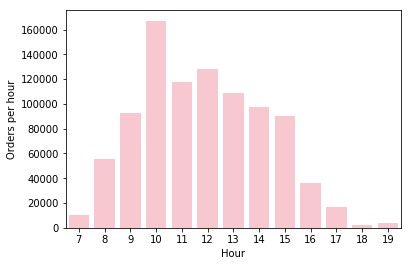

In [95]:
import seaborn as sns
ax = sns.barplot(x="Hour", y="Orders per hour", data=orPerHour,color='pink')


**How many orders (per month)?**

In [36]:
data['Month']=data['InvoiceDate'].dt.month
orders_perMonth=data.groupby('Month')['Quantity'].sum().reset_index(name='Orders per month')
print(orders_perMonth)


    Month  Orders per month
0       1            387785
1       2            283555
2       3            377526
3       4            308815
4       5            395738
5       6            389213
6       7            401759
7       8            421770
8       9            570820
9      10            623401
10     11            754507
11     12            673487


**Make a plot about number of orders per month**

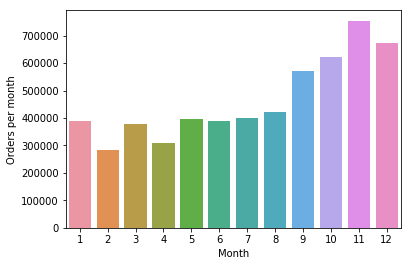

In [58]:
import seaborn as sns
# bar_chart=orders_perMonth.plot.bar(x='Month',y='Orders per month')

ax = sns.barplot(x="Month", y="Orders per month", data=orders_perMonth)

**Top 10 items most sales**

In [67]:
topItem=data.groupby('Description')['Total Sales'].sum().sort_values(ascending=False).reset_index(name='Sales')
print('Top 10 items most sales are: ')
print(topItem.head(10))

Top 10 items most sales are: 
                          Description      Sales
0                      DOTCOM POSTAGE  206248.77
1            REGENCY CAKESTAND 3 TIER  174484.74
2         PAPER CRAFT , LITTLE BIRDIE  168469.60
3  WHITE HANGING HEART T-LIGHT HOLDER  106292.77
4                       PARTY BUNTING   99504.33
5             JUMBO BAG RED RETROSPOT   94340.05
6      MEDIUM CERAMIC TOP STORAGE JAR   81700.92
7                              Manual   78112.82
8                             POSTAGE   78101.88
9                  RABBIT NIGHT LIGHT   66964.99


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

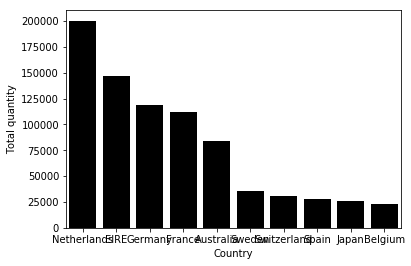

In [78]:
# Your code here
data=data[data['Country']!= 'United Kingdom']
topQuantity=data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index(name='Total quantity')
Ten_countries=topQuantity.head(10)
ax = sns.barplot(x="Country", y="Total quantity", data=Ten_countries,color='black',)

# What can you tell about this?
#Netherlands has the most Quantity and Belgium, Japan and Spain has the least

### You are awesome!!